In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import proplot as plot

In [10]:
varname='tas_2m'
#varname='pr'

### Read in WACCM Skill File

In [11]:
waccm_model='70Lwaccm6'
waccm_base_path='/glade/scratch/kpegion/ESPWG/data/'
waccm_skill_file=waccm_base_path+waccm_model+'/hcst/skill/'+waccm_model+'.'+varname+'.acc.emean.DJF.1999-2015.nc'

In [12]:
waccm_ds=xr.open_dataset(waccm_skill_file)
waccm_varname=list(waccm_ds.keys())
waccm_ds

<xarray.Dataset>
Dimensions:  (lat: 181, lead: 4, lon: 360)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lead     (lead) int64 1 2 3 4
Data variables:
    tas2m    (lead, lat, lon) float64 ...
Attributes:
    prediction_skill:              calculated by climpred https://climpred.re...
    skill_calculated_by_function:  compute_hindcast
    number_of_initializations:     219
    metric:                        pearson_r
    comparison:                    e2o
    dim:                           time
    units:                         None
    created:                       2020-04-22 08:57:30

### Read in CESML46 Skill from fille I transferred over from COLA

In [13]:
cesm1_base_path='/glade/scratch/kpegion/ESPWG/data/30LCESM/skill/'
cesm1_skill_file=cesm1_base_path+'skill.accrmse.30LCESM1-CESM.CPC-TEMP.tas2m.12-2.nc'
#cesm1_skill_file=cesm1_base_path+'skill.accrmse.30LCESM1-CESM.CPC-PRECIP.prsfc.12-2.nc'

In [14]:
cesm1_ds=xr.open_dataset(cesm1_skill_file)
cesm1_ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 5)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1960-01-02 1960-01-03 ... 1960-01-06
Data variables:
    acc      (time, lat, lon) float32 ...
    rmse     (time, lat, lon) float32 ...
Attributes:
    title:         SubX Anomalies
    long_title:    SubX Anomalies
    comments:      SubX project http://cola.gmu.edu/~kpegion/subx/
    institution:   IRI
    source:        SubX IRI
    CreationDate:  2019/08/01 17:49:07
    CreatedBy:     kpegion
    MatlabSource:

### Plot Skill for WACCM and CESM146L

In [15]:
# Colors
cmap='ColdHot'
oceancolor='blue'

# Mapping and grid region
projection='pcarree'
lon_0=180

# Colorbar
extend='both'
cbar_loc='b'
cbar_size=0.8

# Font sizes & format
clabel_fsize=6
clabel_format='%r'
small_font=6
large_font=8


# Mapping and Grid region
latreg=(-70,90)
lon_labels=[-120.0,180,120]
lat_labels=[-60,-40,-20,0,20,40,60]


# Levels
clevs=np.arange(-1,1.01,0.1)
clevs=[-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

# Layout
plot_grid=[[1,2],
           [3,4],
           [5,6],
           [7,8]]

/glade/u/home/kpegion/miniconda3/envs/climpred-dev/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/u/home/kpegion/miniconda3/envs/climpred-dev/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/u/home/kpegion/miniconda3/envs/climpred-dev/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/u/home/kpegion/miniconda3/envs/climpred-dev/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


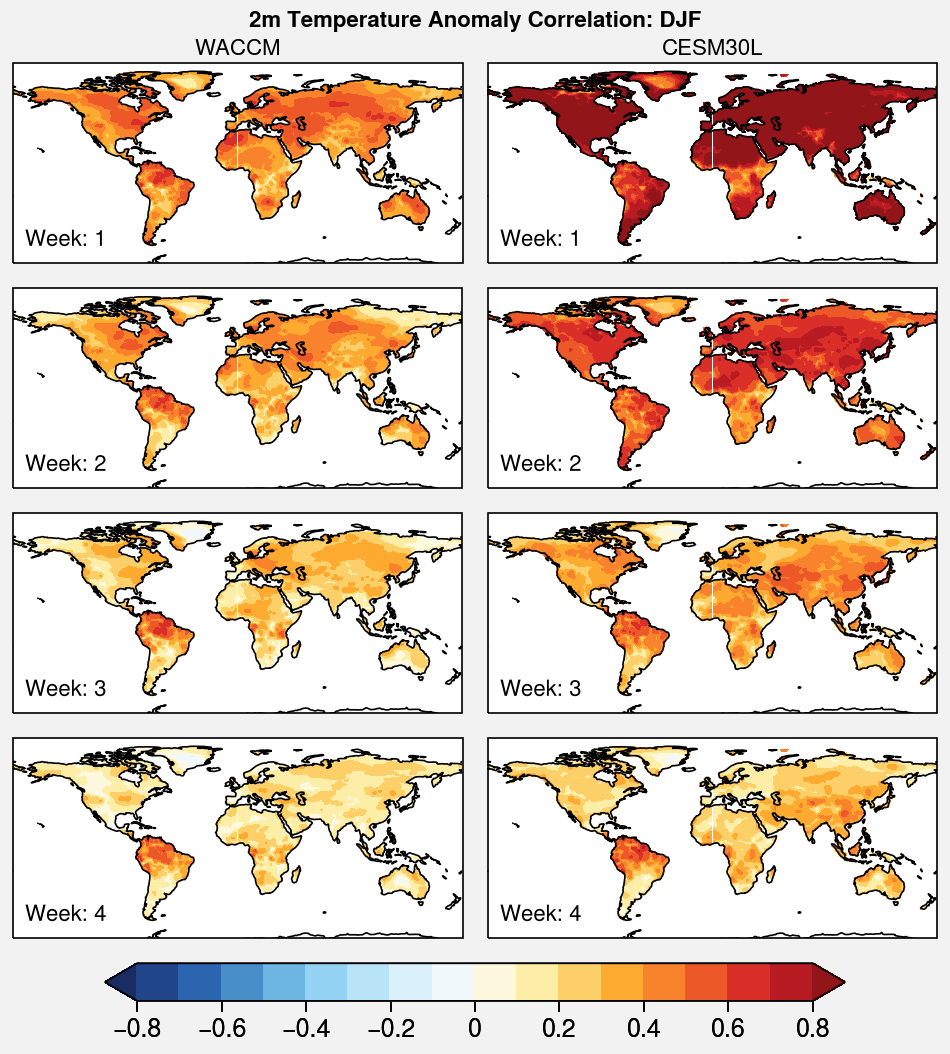

In [16]:
f, axs = plot.subplots(plot_grid,proj='pcarree')
suptitle='2m Temperature Anomaly Correlation: DJF'

ic=0
for iweek in np.arange(4):

    lltitle='Week: '+str(iweek+1)

    # WACCM
    
    if (ic==0):
        title='WACCM'
    else:
        title=''
        
    #data, lons = add_cyclic_point(, coord=waccm_ds['lon'])
    m1=axs[ic].contourf(waccm_ds['lon'],waccm_ds['lat'],
                       waccm_ds[waccm_varname[0]][iweek,:,:],levels=clevs,
                       cmap=cmap, extend='both')

    axs[ic].format(ocean=True,coast=True,title=title,geogrid=False,grid=False,
                      latlim=latreg,lltitle=lltitle,small=small_font,large=large_font)

    # CESM1
    ic=ic+1
    
    if (ic==1):
        title='CESM30L'
    else:
        title=''
        
    m2=axs[ic].contourf(cesm1_ds['lon'],cesm1_ds['lat'],
                       cesm1_ds['acc'][iweek,:,:],levels=clevs,
                       cmap=cmap, extend='both',globe=True)

    axs[ic].format(ocean=True,coast=True,title=title,geogrid=False,grid=False,
                   latlim=latreg,lltitle=lltitle,suptitle=suptitle,
                   small=small_font,large=large_font)
    
    ic=ic+1
# Colorbar
f.colorbar(m1,loc=cbar_loc,length=cbar_size)

#    fname=lev+varname+'GlobalWeek'+str(iweek+1)+'.png'
#    plt.savefig(fname)